In [145]:
import numpy as np
import pandas as pd


In [146]:
df = pd.read_csv('/content/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df.shape

(42000, 785)

In [148]:
import matplotlib.pyplot as plt


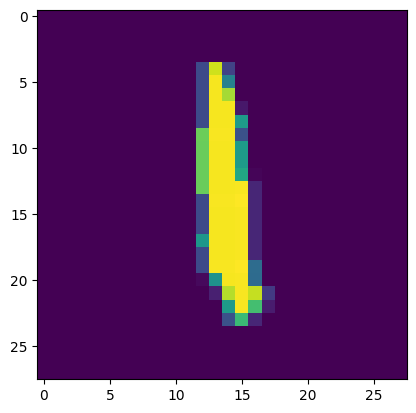

In [149]:
plt.imshow(df.iloc[209,1: ].values.reshape(28,28))

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x = df.iloc[ : , 1: ]
y = df.iloc[ : , 0]

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [154]:
knn = KNeighborsClassifier()

In [155]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [156]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

20.316892623901367


In [157]:
accuracy_score(y_test, y_pred)

0.9648809523809524

# with PCA

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [159]:
scaler = StandardScaler()

In [160]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [161]:
pca = PCA(n_components=0.95)

In [162]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [163]:
x_train.shape

(33600, 315)

In [164]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [165]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

8.351783514022827


In [166]:
accuracy_score(y_test, y_pred)

0.9463095238095238

plotting the features in 3D

In [167]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [170]:
x_train_trf.shape

(33600, 3)

In [171]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2], color=y_train_trf, opacity=0.8)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)
fig.show()

In [172]:
pca.explained_variance_ #these are eigen values (lamda)

array([40.67111198, 29.17023401, 26.74459621])

In [175]:
pca.components_.shape #these are eigen vectors

(3, 315)

# finding PC for 90% variance

In [176]:
df = pd.read_csv('/content/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
x = df.iloc[ : , 1: ]
y = df.iloc[ : , 0]

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [180]:
scaler = StandardScaler()

In [181]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [182]:
pca = PCA(n_components=None)

In [183]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [185]:
knn = KNeighborsClassifier()

In [186]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [187]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

28.217139720916748


In [188]:
accuracy_score(y_test, y_pred)

0.9391666666666667

In [189]:
pca.components_.shape

(784, 784)

In [191]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

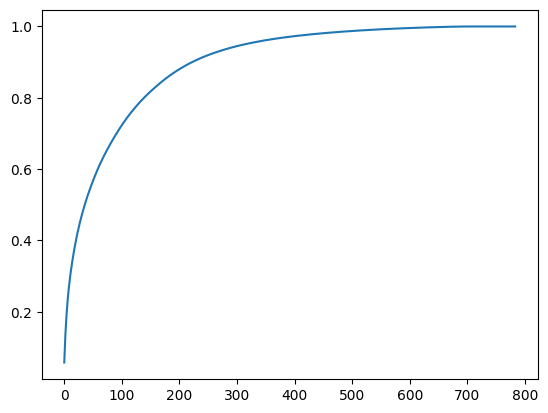

In [193]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))